In this file, I will construct a function for a KDE. It may not be of much use in our research but it's good to build these tools from scratch to understand what's going on. 

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import math
import pandas as pd

In [4]:
O1_all = pd.read_csv("../Data/GWTC-1-confident.csv")
O2_all = pd.read_csv("../Data/GWTC-2.csv")
O3_all = pd.read_csv("../Data/GWTC-3-confident.csv")
O4_all = pd.read_csv("../Data/real_events_O4_ALL.csv")

The kernel density estimation (which will now be referred to as KDE) is given as follows:

$$\hat{f_h}(x) = \frac{1}{N}\sum_{i=0}^N K_h (x-x_i)$$

Where $K_h$ is the kernel. The kernel is a function used to estimate the probability density function (pdf) of a random variable. It's common to use a Gaussian distribution as a kernel but a list of other possible kernels is provided on the Wiki page for kernels.

I'll initially use a Gaussian kernel but may consider other kernels later. 

This constrains $K_h$ to be defined as the regular Gaussian distribution with $\mu = 0$: 

$$K_h(x) = \frac{1}{\sqrt{2\pi} \sigma} e^{\frac{-x^2}{2 \sigma^2}}$$

So the KDE fits a Gaussian kernel with some defined $\sigma$ value (often called the bandwidth of the kernel) around every data point.

It should be noted that when a small $\sigma$ value is chosen, there will be more distinct features present in the KDE while you will get a much smoother KDE if you choose a high $\sigma$ value. 

In [33]:
# I will take sigma = 1 for now
def gaussian(data, bandwidth):
    return 1/(bandwidth*(2*math.pi)**.5) * np.exp(-data**2/(2*bandwidth**2))

def KDE(data, bandwidth):
    # Initially setting all kde_values to be zero (this was ChatGPT's doing)
    kde_values = np.zeros_like(data, dtype=float)

    for i, row in enumerate(data):
        kde_values[i] = (1 / len(data)) * np.sum(gaussian((data - row)/bandwidth, bandwidth))

    return kde_values
# The KDE takes the sums the total difference between the value of a single parameter and all other values in the parameter's column.

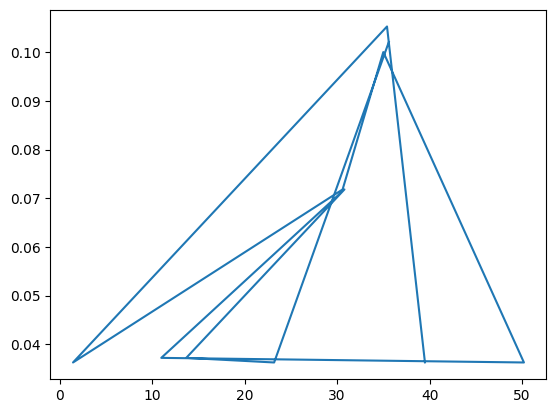

In [35]:
# Again, I'm taking sigma = 1 for now
plt.plot(O1_all["mass_1_source"], KDE(O1_all["mass_1_source"], 1))

(array([1., 1., 1., 0., 1., 1., 3., 2., 0., 1.]),
 array([ 1.46 ,  6.334, 11.208, 16.082, 20.956, 25.83 , 30.704, 35.578,
        40.452, 45.326, 50.2  ]),
 <BarContainer object of 10 artists>)

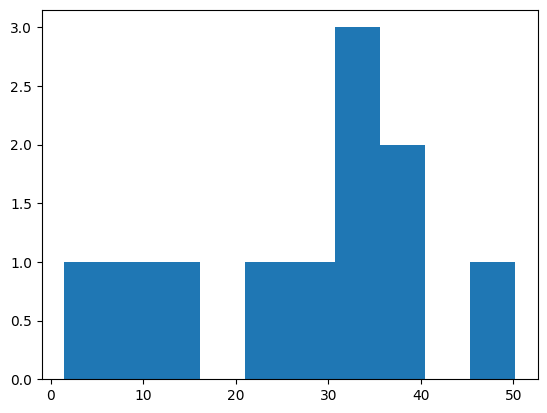

In [32]:
plt.hist(O1_all["mass_1_source"])

Note: I don't know what's going on. I don't know how to smooth the KDE curve. I guess I'll just have to use imports from now on...